In [1]:
include("./main_parser.jl")

draw_hg (generic function with 1 method)

In [2]:
using PyCall, BSON, DecisionTree, Random, CSV

In [3]:
BSON.@load "models/model_rf.bson" rf uniques

spacy = pyimport("spacy")

nlp = spacy.load("en_core_web_lg")

PyObject <spacy.lang.en.English object at 0x7f32f3be4510>

In [5]:
data = DataFrame(CSV.File("data/articles_modified_short.csv"));

In [8]:
df = convert_df(data[:, 1], uniques, rf);

In [14]:
data[:, "Atoms"] = df[:, 2];

In [17]:
nrow(data)

939

In [41]:
nrow(filter(:relation => ==(0), data))

404

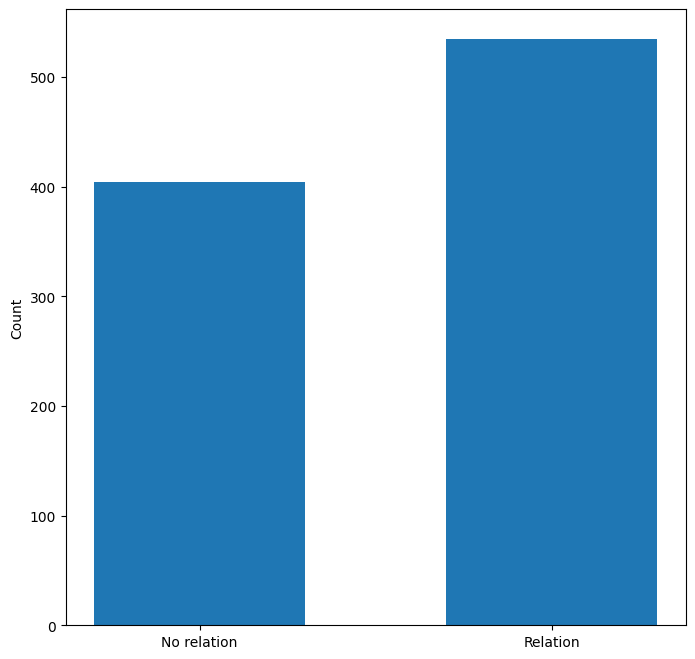

In [60]:
using PyPlot
fig, ax = subplots(figsize=(8,8))
PyPlot.bar([0, 1], [nrow(filter(:relation => ==(0), data)), 
                        nrow(filter(:relation => ==(1), data))],
            width=0.6)
PyPlot.xticks([0,1 ], ["No relation", "Relation"])
PyPlot.ylabel("Count")
PyPlot.savefig("hist.png");

In [62]:
atoms = data[:, 3];

In [79]:
atoms_dict = Dict()
for article in atoms
    for atom in article
        if !(atom in keys(atoms_dict))
            atoms_dict[atom] = 1
        else
            atoms_dict[atom] += 1
        end
    end
end

In [80]:
atoms_dict

Dict{Any, Any} with 7 entries:
  "B" => 423
  "J" => 113
  "X" => 572
  "C" => 4990
  "P" => 1044
  "M" => 1306
  "T" => 892

In [84]:
[value for value in values(atoms_dict)]

7-element Vector{Int64}:
  423
  113
  572
 4990
 1044
 1306
  892

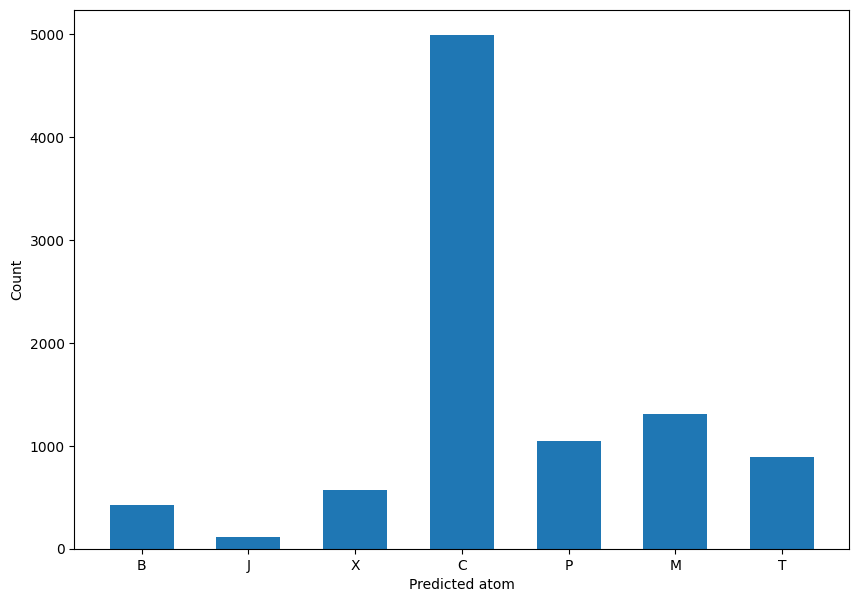

In [89]:
fig, ax = subplots(figsize=(10,7))
PyPlot.bar([1,2,3,4,5,6,7], [value for value in values(atoms_dict)],
            width=0.6)
PyPlot.ylabel("Count")
PyPlot.xticks([1,2,3,4,5,6,7], [key for key in keys(atoms_dict)])
PyPlot.xlabel("Predicted atom")
PyPlot.savefig("atoms.png");